<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e7/YuNaKimInVancouver.jpg" width = 400> </a>

<h2>Battling the Neighborhoods in L.A.: find a place for Korean    BBQ & Cafe</h2>


The goal of my project is to find a good place in the USA for Korean restaurants and coffee cafes. Champion figure skater Yuna Kim is funding a Korean food start-up restaurant and wants to be in a city suitable for patio weather and LA is a great place. The start-up is nterested in serving Korean BBQ one side of the venue with a division wall where they want have a donut shop that serves gourmet hot/cold teas and coffee. This project is intended to help with location.

I will survey the territory with 500 meters of Koreatown utilizing my Foursquare API connection and python notebooks along. The results will be prepared in the form of tables and interactive Geomap that shows the location of the ideal location and other areas of Coffee Shop saturation, and the neighborhood's most common venue should ideally be a Korean restaurant with few coffee shops.

In [42]:
#install conda geopy and folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

!pip install folium==0.5.0
#pip install geopy



In [43]:
!pip install geopy

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

In [2]:
#!wget -q -O 'LA_data.json' https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
#print('Data downloaded!')

In [3]:
#LA_data.head()

<h3> Understanding and Processing LA Neighborhood Data First</h3>

In [4]:
import pandas as pd
df_LA=pd.read_csv("https://usc.data.socrata.com/api/views/9utn-waje/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
df_LA.head()

,set,slug,the_geom,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,latitude,longitude,location
0,L.A. County Neighborhoods (Current),acton,MULTIPOLYGON (((-118.20261747920541 34.5389897...,L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.339109,unincorporated-area,NaN,NaN,-118.169810,34.497355,POINT(34.497355239240846 -118.16981019229348)
1,L.A. County Neighborhoods (Current),adams-normandie,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,-118.300208,34.031461,POINT(34.031461499124156 -118.30020800000011)
2,L.A. County Neighborhoods (Current),agoura-hills,MULTIPOLYGON (((-118.76192500000009 34.1682029...,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.146760,standalone-city,NaN,NaN,-118.759885,34.146736,POINT(34.146736499122795 -118.75988450000015)
3,L.A. County Neighborhoods (Current),agua-dulce,MULTIPOLYGON (((-118.2546773959221 34.55830403...,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.462632,unincorporated-area,NaN,NaN,-118.317104,34.504927,POINT(34.504926999796837 -118.3171036690717)
4,L.A. County Neighborhoods (Current),alhambra,MULTIPOLYGON (((-118.12174700000014 34.1050399...,L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.623814,standalone-city,NaN,NaN,-118.136512,34.085539,POINT(34.085538999123571 -118.13651200000021)


In [5]:
df1_LA = df_LA[['set','name','latitude','longitude']]

In [6]:
df1_LA.head()

,set,name,latitude,longitude
0,L.A. County Neighborhoods (Current),Acton,-118.169810,34.497355
1,L.A. County Neighborhoods (Current),Adams-Normandie,-118.300208,34.031461
2,L.A. County Neighborhoods (Current),Agoura Hills,-118.759885,34.146736
3,L.A. County Neighborhoods (Current),Agua Dulce,-118.317104,34.504927
4,L.A. County Neighborhoods (Current),Alhambra,-118.136512,34.085539


In [7]:
print('The LA dataframe has {} neighborhoods.'.format(
        len(df1_LA['name'].unique()),
        df1_LA.shape[0]
    )
)

The LA dataframe has 272 neighborhoods.


In [8]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [9]:
LA_data = df1_LA[df1_LA['set'] == 'L.A. County Neighborhoods (Current)'].reset_index(drop=True)
LA_data.head()

,set,name,latitude,longitude
0,L.A. County Neighborhoods (Current),Acton,-118.169810,34.497355
1,L.A. County Neighborhoods (Current),Adams-Normandie,-118.300208,34.031461
2,L.A. County Neighborhoods (Current),Agoura Hills,-118.759885,34.146736
3,L.A. County Neighborhoods (Current),Agua Dulce,-118.317104,34.504927
4,L.A. County Neighborhoods (Current),Alhambra,-118.136512,34.085539


In [10]:
CLIENT_ID = 'EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC' # your Foursquare ID
CLIENT_SECRET = 'RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC
CLIENT_SECRET:RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD


In [11]:
LA_data.loc[[28], 'name']

28    Koreatown
Name: name, dtype: object

In [12]:
neighborhood_latitude = LA_data.loc[28, 'longitude'] # neighborhood latitude value
neighborhood_longitude = LA_data.loc[28, 'latitude'] # neighborhood longitude value

neighborhood_name = LA_data.loc[28, 'name'] # neighborhood_name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Koreatown are 34.06451049912376, -118.3049585.


In [13]:
# type your answer here
LIMIT=10000 # number of venues

#define radius
radius = 30000

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC&client_secret=RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD&v=20180604&ll=34.06451049912376,-118.3049585&radius=30000&limit=10000'

In [14]:
results = requests.get(url).json()

<h2>I know Koreatown is a great spot for nightlife!</h2>

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364
1,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
2,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704
3,Salt & Straw,Ice Cream Shop,34.075836,-118.323535
4,Modo Yoga LA,Yoga Studio,34.067658,-118.343974


In [17]:
print('{} venues were returned by Foursquare for Koreatown area.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare for Koreatown area.


## 2. Exploring the Neighborhoods in LA

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][28]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
nearby_venues.head()

,name,categories,lat,lng
0,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364
1,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
2,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704
3,Salt & Straw,Ice Cream Shop,34.075836,-118.323535
4,Modo Yoga LA,Yoga Studio,34.067658,-118.343974


In [20]:
nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
American Restaurant,1,1,1
Art Gallery,2,2,2
Art Museum,2,2,2
Bakery,1,1,1
Basketball Stadium,1,1,1
Bookstore,1,1,1
Boutique,2,2,2
Breakfast Spot,2,2,2
Brewery,1,1,1


In [21]:
print('There are {} uniques categories.'.format(len(nearby_venues['name'].unique())))

There are 95 uniques categories.


In [22]:
nearby_venues.shape

(100, 4)

In [23]:
nearby_venues.columns = ['Venue Name', 'Category', 'Lat', 'Lng']
nearby_venues.head()

,Venue Name,Category,Lat,Lng
0,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364
1,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
2,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704
3,Salt & Straw,Ice Cream Shop,34.075836,-118.323535
4,Modo Yoga LA,Yoga Studio,34.067658,-118.343974


In [24]:
LA_onehot = pd.get_dummies(nearby_venues['Category'], prefix="", prefix_sep="")

In [25]:
# add neighborhood_name column back to dataframe
LA_onehot['Neighborhood_name'] = LA_data['name'] 
LA_onehot.head()

,American Restaurant,Art Gallery,Art Museum,Bakery,Basketball Stadium,Bookstore,Boutique,Breakfast Spot,Brewery,Café,Climbing Gym,Coffee Shop,College Residence Hall,Concert Hall,Farmers Market,Food Truck,French Restaurant,German Restaurant,Grocery Store,Gym,Gymnastics Gym,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Market,Mediterranean Restaurant,Movie Theater,Music Venue,New American Restaurant,Observatory,Park,Performing Arts Venue,Pizza Place,Plaza,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Theater,Trail,Wine Bar,Wine Shop,Yoga Studio,Neighborhood_name
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acton
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adams-Normandie
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Agoura Hills
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agua Dulce
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Alhambra


In [26]:
# I'm getting somewhere stopped here 


# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood_name,American Restaurant,Art Gallery,Art Museum,Bakery,Basketball Stadium,Bookstore,Boutique,Breakfast Spot,Brewery,Café,Climbing Gym,Coffee Shop,College Residence Hall,Concert Hall,Farmers Market,Food Truck,French Restaurant,German Restaurant,Grocery Store,Gym,Gymnastics Gym,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Market,Mediterranean Restaurant,Movie Theater,Music Venue,New American Restaurant,Observatory,Park,Performing Arts Venue,Pizza Place,Plaza,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Theater,Trail,Wine Bar,Wine Shop,Yoga Studio
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Agua Dulce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alhambra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
#grouped = venues_onehot.groupby('Street').mean().reset_index()
#grouped


LA_venues_grouped= LA_onehot.groupby('Neighborhood_name').mean().reset_index()
LA_venues_grouped.head()

,Neighborhood_name,American Restaurant,Art Gallery,Art Museum,Bakery,Basketball Stadium,Bookstore,Boutique,Breakfast Spot,Brewery,Café,Climbing Gym,Coffee Shop,College Residence Hall,Concert Hall,Farmers Market,Food Truck,French Restaurant,German Restaurant,Grocery Store,Gym,Gymnastics Gym,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Market,Mediterranean Restaurant,Movie Theater,Music Venue,New American Restaurant,Observatory,Park,Performing Arts Venue,Pizza Place,Plaza,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Theater,Trail,Wine Bar,Wine Shop,Yoga Studio
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Agua Dulce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alhambra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
LA_venues_grouped.shape

(100, 53)

In [29]:
num_top_venues = 5

for hood in LA_venues_grouped['Neighborhood_name']:
    print("----"+hood+"----")
    temp = LA_venues_grouped[LA_venues_grouped['Neighborhood_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
                      venue  freq
0         Korean Restaurant   1.0
1                    Market   0.0
2  Mediterranean Restaurant   0.0
3             Movie Theater   0.0
4               Music Venue   0.0


----Adams-Normandie----
                 venue  freq
0          Coffee Shop   1.0
1  American Restaurant   0.0
2       Sandwich Place   0.0
3        Movie Theater   0.0
4          Music Venue   0.0


----Agoura Hills----
                      venue  freq
0            Sandwich Place   1.0
1               Art Gallery   0.0
2  Mediterranean Restaurant   0.0
3             Movie Theater   0.0
4               Music Venue   0.0


----Agua Dulce----
                 venue  freq
0       Ice Cream Shop   1.0
1  American Restaurant   0.0
2               Market   0.0
3        Movie Theater   0.0
4          Music Venue   0.0


----Alhambra----
                      venue  freq
0               Yoga Studio   1.0
1               Art Gallery   0.0
2  Mediterranean Restaurant   0.0
3    

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [31]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_name'] = LA_venues_grouped['Neighborhood_name']

for ind in np.arange(LA_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,Korean Restaurant,Wine Shop,Ice Cream Shop,Hotel,Home Service
1,Adams-Normandie,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
2,Agoura Hills,Sandwich Place,Yoga Studio,College Residence Hall,Hotel,Home Service
3,Agua Dulce,Ice Cream Shop,Yoga Studio,Wine Shop,Hotel,Home Service
4,Alhambra,Yoga Studio,Wine Shop,Ice Cream Shop,Hotel,Home Service
5,Alondra Park,French Restaurant,Yoga Studio,Wine Shop,Ice Cream Shop,Hotel
6,Altadena,Pizza Place,Yoga Studio,Italian Restaurant,Hotel,Home Service
7,Angeles Crest,Restaurant,Yoga Studio,Italian Restaurant,Hotel,Home Service
8,Arcadia,Taiwanese Restaurant,Yoga Studio,College Residence Hall,Hotel,Home Service
9,Arleta,Breakfast Spot,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel


In [32]:
#select neighborhoods where 1stMost Common Venue Korean rest. and 2nd most common venue is Coffee Shop
#I need to establish a venue of Korean BBQ and Boba tea in the area.

df_Korean1st= neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Korean Restaurant']

df_Korean1st

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,Korean Restaurant,Wine Shop,Ice Cream Shop,Hotel,Home Service


In [33]:
df_Coffee1st= neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Coffee Shop']

df_Coffee1st

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Adams-Normandie,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
30,Broadway-Manchester,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
44,Chesterfield Square,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
47,Citrus,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
59,Downey,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
77,Exposition Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
82,Glassell Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
91,Hancock Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
96,Northridge,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel


In [34]:
df_Coff_Kor= [df_Korean1st,df_Coffee1st]
result = pd.concat(df_Coff_Kor)

result

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,Korean Restaurant,Wine Shop,Ice Cream Shop,Hotel,Home Service
1,Adams-Normandie,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
30,Broadway-Manchester,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
44,Chesterfield Square,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
47,Citrus,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
59,Downey,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
77,Exposition Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
82,Glassell Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
91,Hancock Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel
96,Northridge,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel


In [35]:
result_location = result.join(LA_data.set_index('name'), on='Neighborhood_name')
result_location

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude
0,Acton,Korean Restaurant,Wine Shop,Ice Cream Shop,Hotel,Home Service,L.A. County Neighborhoods (Current),-118.169810,34.497355
1,Adams-Normandie,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.300208,34.031461
30,Broadway-Manchester,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.275352,33.941224
44,Chesterfield Square,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.313208,33.983763
47,Citrus,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-117.892164,34.116180
59,Downey,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.130423,33.937677
77,Exposition Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.298876,34.018262
82,Glassell Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.236427,34.114405
91,Hancock Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.335009,34.072759
96,Northridge,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.527969,34.238805


In [36]:
#df results
result_location['lng'] = result_location['latitude'] 
result_location.head()




,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng
0,Acton,Korean Restaurant,Wine Shop,Ice Cream Shop,Hotel,Home Service,L.A. County Neighborhoods (Current),-118.169810,34.497355,-118.169810
1,Adams-Normandie,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208
30,Broadway-Manchester,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.275352,33.941224,-118.275352
44,Chesterfield Square,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.313208,33.983763,-118.313208
47,Citrus,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-117.892164,34.116180,-117.892164


In [37]:

result_location['lat'] = result_location['longitude'] 
result_location

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng,lat
0,Acton,Korean Restaurant,Wine Shop,Ice Cream Shop,Hotel,Home Service,L.A. County Neighborhoods (Current),-118.169810,34.497355,-118.169810,34.497355
1,Adams-Normandie,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208,34.031461
30,Broadway-Manchester,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.275352,33.941224,-118.275352,33.941224
44,Chesterfield Square,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.313208,33.983763,-118.313208,33.983763
47,Citrus,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-117.892164,34.116180,-117.892164,34.116180
59,Downey,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.130423,33.937677,-118.130423,33.937677
77,Exposition Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.298876,34.018262,-118.298876,34.018262
82,Glassell Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.236427,34.114405,-118.236427,34.114405
91,Hancock Park,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.335009,34.072759,-118.335009,34.072759
96,Northridge,Coffee Shop,Yoga Studio,Concert Hall,Ice Cream Shop,Hotel,L.A. County Neighborhoods (Current),-118.527969,34.238805,-118.527969,34.238805


In [38]:
result_location.shape

(10, 11)

<h2> Based on the above table, Acton is the only predominantly location for Korean Restaurants.</h2>
Conveniently, coffee shops are not on their top 5 lists of venues. 

__Make a Map of the Neighborhoods and Venues within top two picks__


<h3> Make maps here</h3>

In [40]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=8) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Acton
#folium.features.CircleMarker(
 #   [lat, lng],
  #  radius=10,
   # color='red',
    #popup='Citrus',
#    fill = True,
 #   fill_color = 'red',
  #  fill_opacity = 0.6
# ).add_to(venues_map)

folium.Marker(
    location=[34.497355, -118.169810],
    popup='Acton, Los Angeles',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, Neighborhood_name in zip(result_location.lat, result_location.lng, result_location.Neighborhood_name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        #popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)



# display map
venues_map

The blue respresent the neighborhoods where Coffee Shops are the 1st most common venues otherwise listed as having a high concentration of coffee shops. 
Acton, Los Angeles (labels by the red drop dot) is secluded from these high coffee shop concesntrations and therefore represents a potential for growht in 
expanding the LA coffee drinking market to the Korean Resturant area.  While catering to the Korean Restaurant foods and open in the late evening hours,
caffeine drinks and possibly alcohol infusions will make a nice post concert hall evening. 

<h3>Make Bar Charts Here of Top Restaurants</h3>

In [84]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


In [99]:
test=nearby_venues
test.head()

,Venue Name,Category,Lat,Lng,Neighborhood_name
0,Ahgassi Gopchang,Korean Restaurant,34.063397,-118.303863,Acton
1,Hae Jang Chon Korean BBQ Restaurant,Korean Restaurant,34.063888,-118.306075,Adams-Normandie
2,Kyochon Chicken,Korean Restaurant,34.063830,-118.306490,Agoura Hills
3,Byul Yang Gopchang,BBQ Joint,34.063668,-118.305999,Agua Dulce
4,BCD Tofu House,Korean Restaurant,34.061961,-118.302713,Alhambra


In [103]:
# add neighborhood_name column back to dataframe
test['Neighborhood_name'] = LA_data['name'] 
test

,Venue Name,Category,Lat,Lng,Neighborhood_name
0,Ahgassi Gopchang,Korean Restaurant,34.063397,-118.303863,Acton
1,Hae Jang Chon Korean BBQ Restaurant,Korean Restaurant,34.063888,-118.306075,Adams-Normandie
2,Kyochon Chicken,Korean Restaurant,34.063830,-118.306490,Agoura Hills
3,Byul Yang Gopchang,BBQ Joint,34.063668,-118.305999,Agua Dulce
4,BCD Tofu House,Korean Restaurant,34.061961,-118.302713,Alhambra
5,Sushi One,Sushi Restaurant,34.063571,-118.308160,Alondra Park
6,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796,Artesia
7,Cafe Nandarang,Café,34.063816,-118.305862,Altadena
8,The Normandie Club,Hotel Bar,34.063555,-118.300856,Angeles Crest
9,Bumsan Organic Milk Bar,Ice Cream Shop,34.064297,-118.309052,Arcadia


In [101]:
# step 1 get data set and ready 
LA_Korea=test[['Neighborhood_name','Category']]

In [102]:
LA_Korea.head()

,Neighborhood_name,Category
0,Acton,Korean Restaurant
1,Adams-Normandie,Korean Restaurant
2,Agoura Hills,Korean Restaurant
3,Agua Dulce,BBQ Joint
4,Alhambra,Korean Restaurant


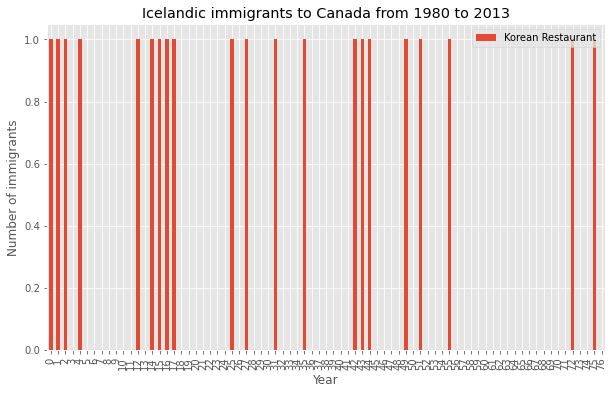

In [91]:
# step 2: plot data
LA_keepers.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of Korean Restaurants') # add y-label to the plot
plt.title('Korean Resturants') # add title to the plot

plt.show()

In [84]:
# type your answer here

LA_venues = getNearbyVenues(names=LA_data['name'],
                                   latitudes=LA_data['latitude'],
                                   longitudes=LA_data['longitude']
                                  )



Acton


KeyError: 'groups'

In [57]:
LA_data.groupby('name').count().head()

,set,latitude,longitude
name,,,
Acton,1,1,1
Adams-Normandie,1,1,1
Agoura Hills,1,1,1
Agua Dulce,1,1,1
Alhambra,1,1,1


In [58]:
print('There are {} uniques categories.'.format(len(LA_data['set'].unique())))

There are 1 uniques categories.


In [59]:
LA_onehot = pd.get_dummies(nearby_venues[['set']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['name'] = LA_data['name'] 

# move neighborhood column to the first column
fixed_columns = [La_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

KeyError: "None of [Index(['set'], dtype='object')] are in the [columns]"